<a href="https://colab.research.google.com/github/mk9652064965/Cardiovascular-Risk-Prediction/blob/main/Cardiovascular_Risk_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The dataset is from an ongoing cardiovascular study on residents of the town of Framingham, Massachusetts. The classification goal is to predict whether the patient has a 10-year risk of future coronary heart disease (CHD). The dataset provides the patients’ information. It includes over 4,000 records and 15 attributes.

Variables 

Each attribute is a potential risk factor. There are both demographic, behavioral, and medical risk factors.

Data Description 

Demographic: 

• Sex: male or female("M" or "F") 

• Age: Age of the patient;(Continuous - Although the recorded ages have been truncated to whole numbers, the concept of age is continuous)

Behavioral 

• is_smoking: whether or not the patient is a current smoker ("YES" or "NO")

• Cigs Per Day: the number of cigarettes that the person smoked on average in one day.(can be considered continuous as one can have any number of cigarettes, even half a cigarette.)

Medical( history)

• BP Meds: whether or not the patient was on blood pressure medication (Nominal) • Prevalent Stroke: whether or not the patient had previously had a stroke (Nominal) • Prevalent Hyp: whether or not the patient was hypertensive (Nominal)

• Diabetes: whether or not the patient had diabetes (Nominal)

Medical(current) 

• Tot Chol: total cholesterol level (Continuous)

• Sys BP: systolic blood pressure (Continuous) 

• Dia BP: diastolic blood pressure (Continuous) 

• BMI: Body Mass Index (Continuous) 

• Heart Rate: heart rate (Continuous - In medical research, variables such as heart rate though in fact discrete, yet are considered continuous because of large number of possible values.) 

• Glucose: glucose level (Continuous) 

Predict variable (desired target) 

• 10-year risk of coronary heart disease CHD(binary: “1”, means “Yes”, “0” means “No”) - DV

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import time
import random 
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from pylab import rcParams
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost.sklearn import XGBRegressor
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn import metrics

from shapely.geometry import Point,Polygon
import descartes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Importing the dataset
data = pd.read_csv('/content/drive/MyDrive/data_cardiovascular_risk.csv')

In [ ]:
data.head()

,id,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,0,64,2.0,F,YES,3.0,0.0,0,0,0,221.0,148.0,85.0,NaN,90.0,80.0,1
1,1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1
4,4,64,1.0,F,YES,30.0,0.0,0,0,0,241.0,136.5,85.0,26.42,70.0,77.0,0


In [ ]:
data.shape

(3390, 17)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3390 entries, 0 to 3389
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               3390 non-null   int64  
 1   age              3390 non-null   int64  
 2   education        3303 non-null   float64
 3   sex              3390 non-null   object 
 4   is_smoking       3390 non-null   object 
 5   cigsPerDay       3368 non-null   float64
 6   BPMeds           3346 non-null   float64
 7   prevalentStroke  3390 non-null   int64  
 8   prevalentHyp     3390 non-null   int64  
 9   diabetes         3390 non-null   int64  
 10  totChol          3352 non-null   float64
 11  sysBP            3390 non-null   float64
 12  diaBP            3390 non-null   float64
 13  BMI              3376 non-null   float64
 14  heartRate        3389 non-null   float64
 15  glucose          3086 non-null   float64
 16  TenYearCHD       3390 non-null   int64  
dtypes: float64(9),

In [ ]:
data.isnull().sum()

id                   0
age                  0
education           87
sex                  0
is_smoking           0
cigsPerDay          22
BPMeds              44
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             38
sysBP                0
diaBP                0
BMI                 14
heartRate            1
glucose            304
TenYearCHD           0
dtype: int64

It shows the number of np.nan or null values or missing values are present in the dataset:

education: 87

cigsPerDay: 22

BPMeds: 44

totChol: 38

BMI: 14

heartRate: 1

glucose: 304

In [ ]:
data.duplicated().sum()

0

It shows that there are no Duplicated Values present in the dataset.

In [ ]:
print((data["glucose"].mode())[0])

75.0


In [ ]:
data["glucose"].fillna((data["glucose"].mode())[0], inplace=True)

Filling the missing spaces of glucosecolumn with the mode of the data (Mode = 75) present to reduce the number of missing data in our dataset

In [ ]:
data.dropna(inplace=True)
data.isnull().sum()

id                 0
age                0
education          0
sex                0
is_smoking         0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

Dropping all other rows containing missing values

In [ ]:
data.drop(['id',],axis=1,inplace=True)

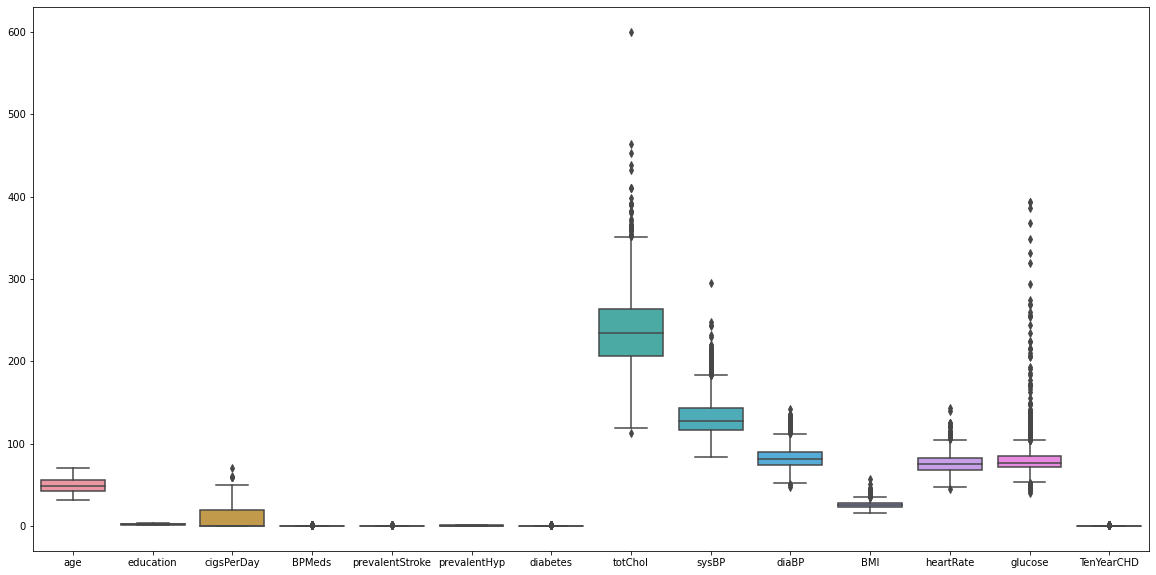

In [ ]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

In [ ]:
data.head(3)

,age,education,sex,is_smoking,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1,36,4.0,M,NO,0.0,0.0,0,1,0,212.0,168.0,98.0,29.77,72.0,75.0,0
2,46,1.0,F,YES,10.0,0.0,0,0,0,250.0,116.0,71.0,20.35,88.0,94.0,0
3,50,1.0,M,YES,20.0,0.0,0,1,0,233.0,158.0,88.0,28.26,68.0,94.0,1


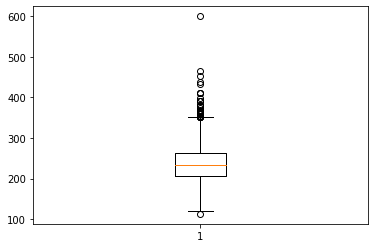

In [ ]:
plt.boxplot(data["totChol"])
plt.show()

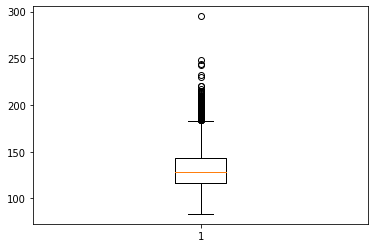

In [ ]:
plt.boxplot(data["sysBP"])
plt.show()

In [ ]:
data['totChol'].describe()

count    3189.000000
mean      236.968642
std        44.537998
min       113.000000
25%       206.000000
50%       234.000000
75%       264.000000
max       600.000000
Name: totChol, dtype: float64

In [ ]:
data['sysBP'].describe()

count    3189.000000
mean      132.436344
std        22.176848
min        83.500000
25%       117.000000
50%       128.000000
75%       143.500000
max       295.000000
Name: sysBP, dtype: float64

**Removable Outliers are detected in totChol and sysBP columns of our dataset. Outliers in all other numerical columns are important and thus cannot be removed.**

In [ ]:
data = data[data['totChol']<340.0]
data = data[data['totChol']>120.0]
data = data[data['sysBP']<170.0]

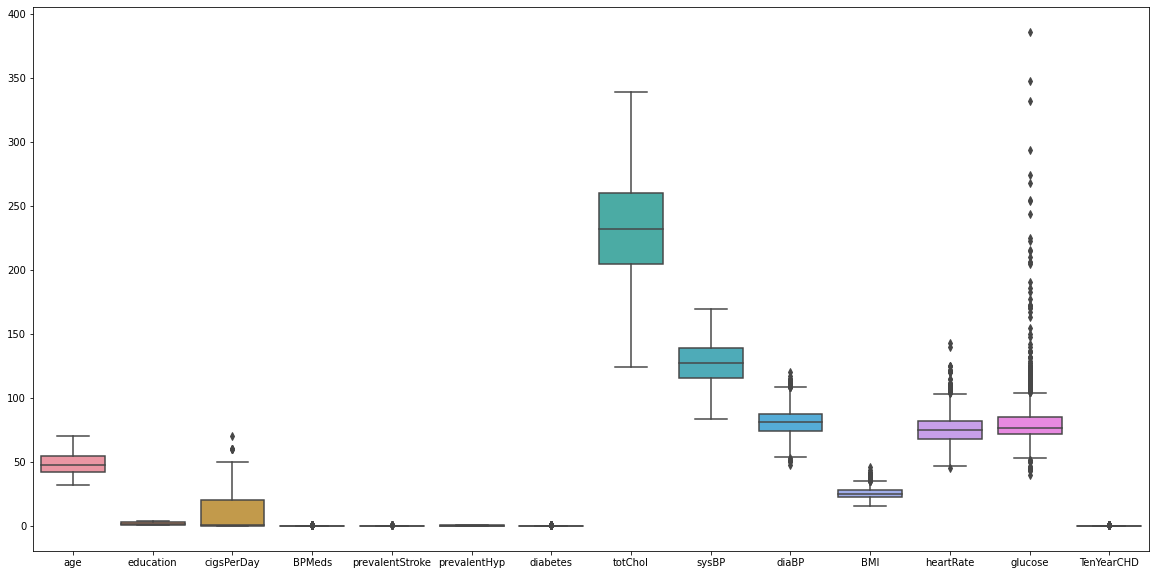

In [ ]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(data=data)
plt.show()

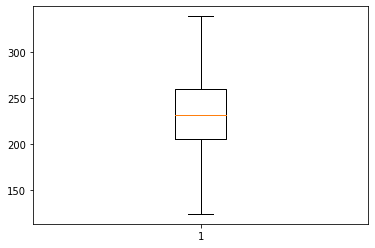

In [ ]:
plt.boxplot(data["totChol"])
plt.show()

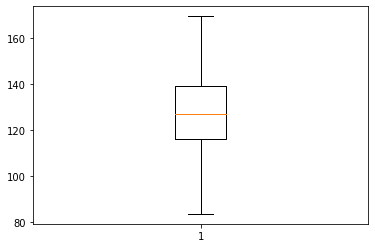

In [ ]:
plt.boxplot(data["sysBP"])
plt.show()

Now with the missing values, outliers and duplicate values dealt with, we proceed to perform EDA

**Exploratory Data Analysis**

In [ ]:
data.describe()

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000,2914.000000
mean,48.828071,1.994852,9.295470,0.015786,0.005491,0.262526,0.020933,233.257035,128.379890,81.246225,25.553909,75.685655,80.587852,0.133493
std,8.441858,1.025076,11.903471,0.124668,0.073908,0.440082,0.143186,39.902742,16.629275,10.285549,3.894772,11.854769,19.904527,0.340166
min,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,124.000000,83.500000,48.000000,15.960000,45.000000,40.000000,0.000000
25%,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,205.000000,116.000000,74.000000,22.890000,68.000000,72.000000,0.000000
50%,48.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,232.000000,127.000000,81.000000,25.140000,75.000000,77.000000,0.000000
75%,55.000000,3.000000,20.000000,0.000000,0.000000,1.000000,0.000000,260.000000,139.000000,87.875000,27.800000,82.000000,85.000000,0.000000
max,70.000000,4.000000,70.000000,1.000000,1.000000,1.000000,1.000000,339.000000,169.500000,120.000000,45.800000,143.000000,386.000000,1.000000


An overall Statistical Information is shown

It is clearly evident that none of the data is missing in columns.

It also shows the mean, standard deviation and other statistical metrices of the dataset

,age,education,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
age,1.000000,-0.156998,-0.178898,0.089020,0.037277,0.255544,0.098971,0.281454,0.358125,0.161127,0.118071,-0.014128,0.096071,0.217079
education,-0.156998,1.000000,0.001756,0.027499,-0.017751,-0.061686,-0.039026,-0.027345,-0.118462,-0.033725,-0.115104,-0.050530,-0.036564,-0.057098
cigsPerDay,-0.178898,0.001756,1.000000,-0.042933,-0.046718,-0.052166,-0.036863,-0.018914,-0.074518,-0.044680,-0.086865,0.064476,-0.056430,0.072408
BPMeds,0.089020,0.027499,-0.042933,1.000000,0.139619,0.212264,0.000713,0.035483,0.138271,0.112221,0.036864,-0.004307,0.005113,0.055526
prevalentStroke,0.037277,-0.017751,-0.046718,0.139619,1.000000,0.061211,0.021574,0.001151,0.056539,0.047444,0.002549,-0.011743,0.029541,0.052762
prevalentHyp,0.255544,-0.061686,-0.052166,0.212264,0.061211,1.000000,0.054402,0.127799,0.660045,0.561302,0.275305,0.133870,0.058444,0.123550
diabetes,0.098971,-0.039026,-0.036863,0.000713,0.021574,0.054402,1.000000,0.034507,0.064204,0.025985,0.073728,0.035832,0.565289,0.069472
totChol,0.281454,-0.027345,-0.018914,0.035483,0.001151,0.127799,0.034507,1.000000,0.194133,0.164334,0.139861,0.071461,0.038957,0.062823
sysBP,0.358125,-0.118462,-0.074518,0.138271,0.056539,0.660045,0.064204,0.194133,1.000000,0.738927,0.308309,0.171130,0.091551,0.151943
diaBP,0.161127,-0.033725,-0.044680,0.112221,0.047444,0.561302,0.025985,0.164334,0.738927,1.000000,0.353240,0.168558,0.031999,0.082783


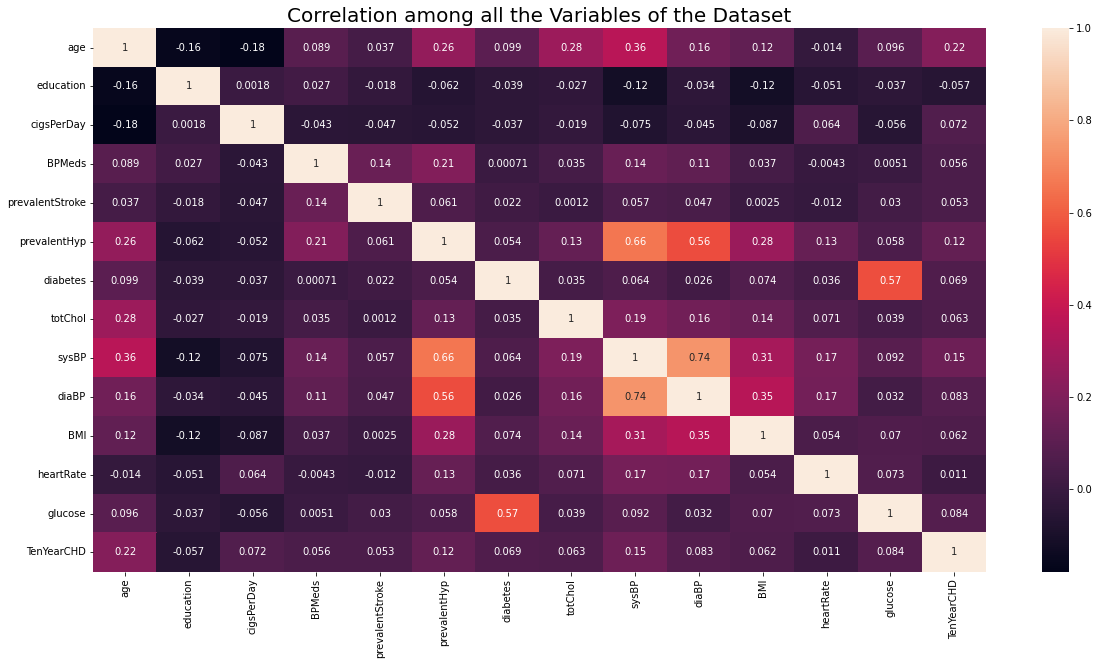

In [ ]:
#Checking relationship between variables
cor=data.corr()
plt.figure(figsize=(20,10), facecolor='w')
sns.heatmap(cor,xticklabels=cor.columns,yticklabels=cor.columns,annot=True)
plt.title("Correlation among all the Variables of the Dataset", size=20)
cor

1. Univariate Analysis

Categorical Features

In [ ]:
categorical_features = ['sex', 'education', 'is_smoking', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes']

In [ ]:
for feature in categorical_features:
    print(feature,':')
    print(data[feature].value_counts())
    print("-----------------")

sex :
F    1608
M    1306
Name: sex, dtype: int64
-----------------
education :
1.0    1194
2.0     885
3.0     491
4.0     344
Name: education, dtype: int64
-----------------
is_smoking :
YES    1467
NO     1447
Name: is_smoking, dtype: int64
-----------------
BPMeds :
0.0    2868
1.0      46
Name: BPMeds, dtype: int64
-----------------
prevalentStroke :
0    2898
1      16
Name: prevalentStroke, dtype: int64
-----------------
prevalentHyp :
0    2149
1     765
Name: prevalentHyp, dtype: int64
-----------------
diabetes :
0    2853
1      61
Name: diabetes, dtype: int64
-----------------


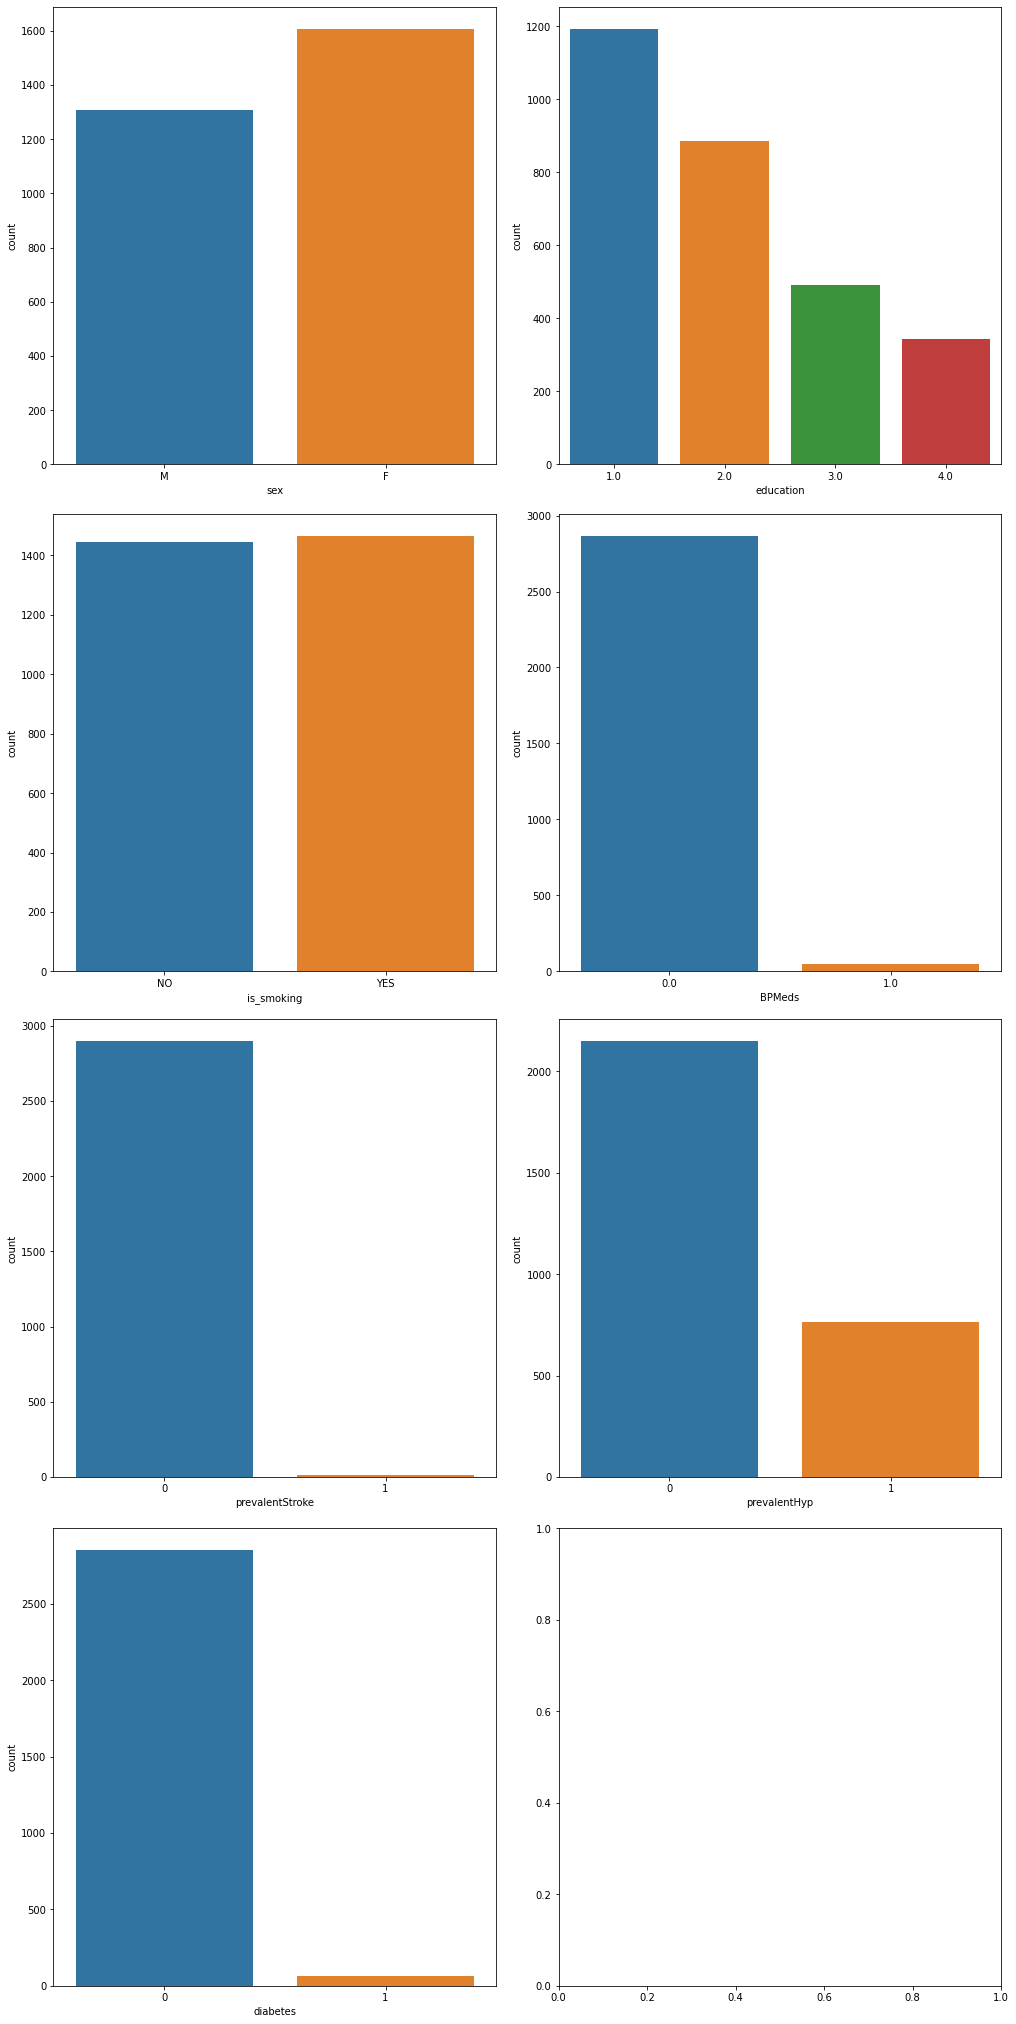

In [ ]:
num_plots = len(categorical_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(categorical_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.countplot(x=var, data=data, ax=axs[row][pos])

Among the categorical features:

BPmeds, prevalentStroke and diabetes are highly imbalanced.

There are four levels of education whereas the rest categorical features are all binary

The number of Smokers and non-Smokers in is_smoking is almost the same

Numerical Features

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



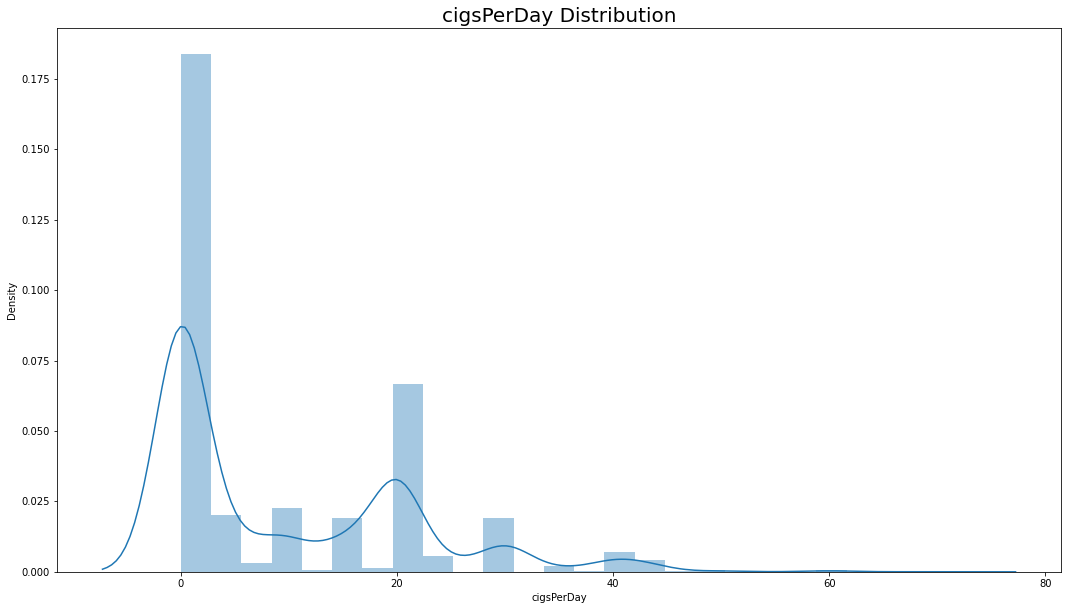

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



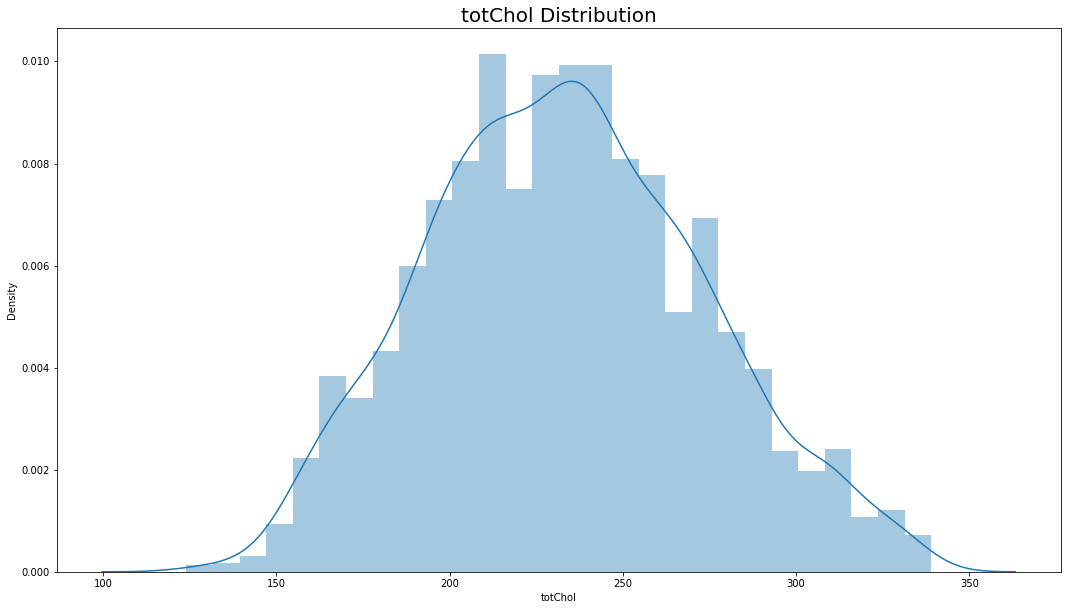

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



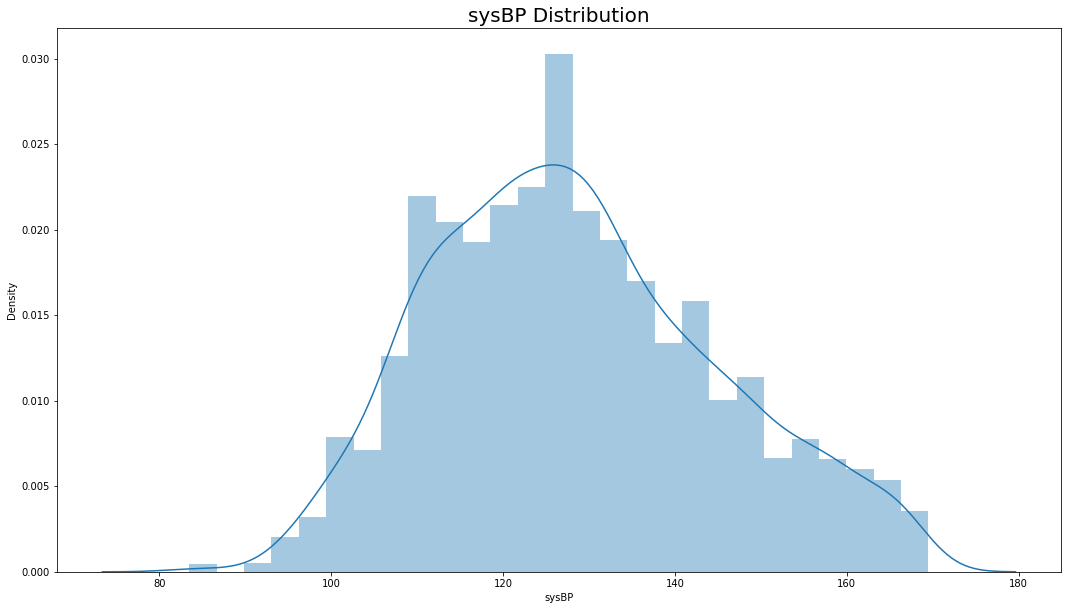

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



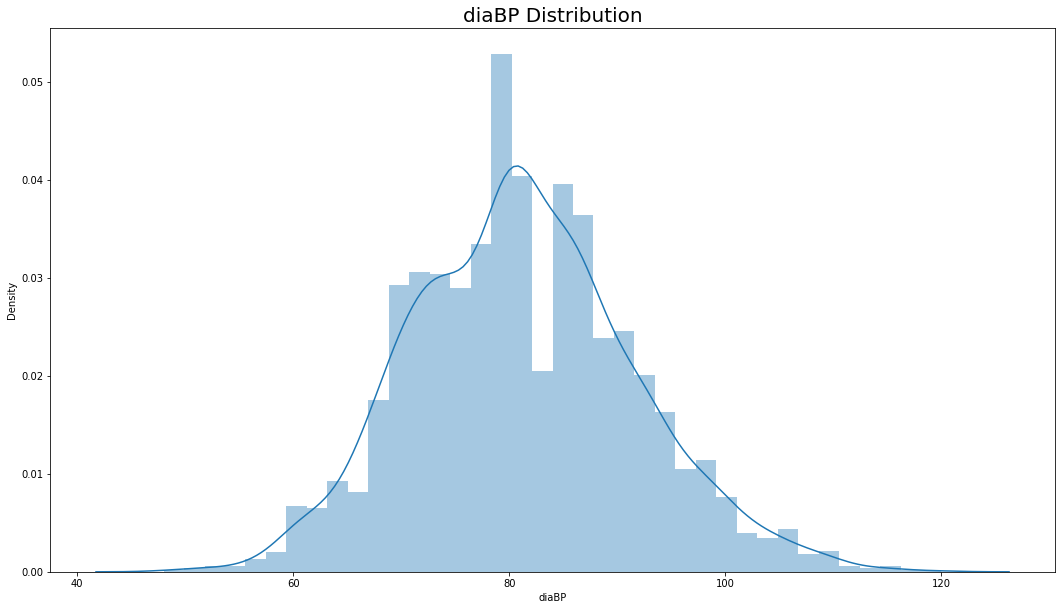

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



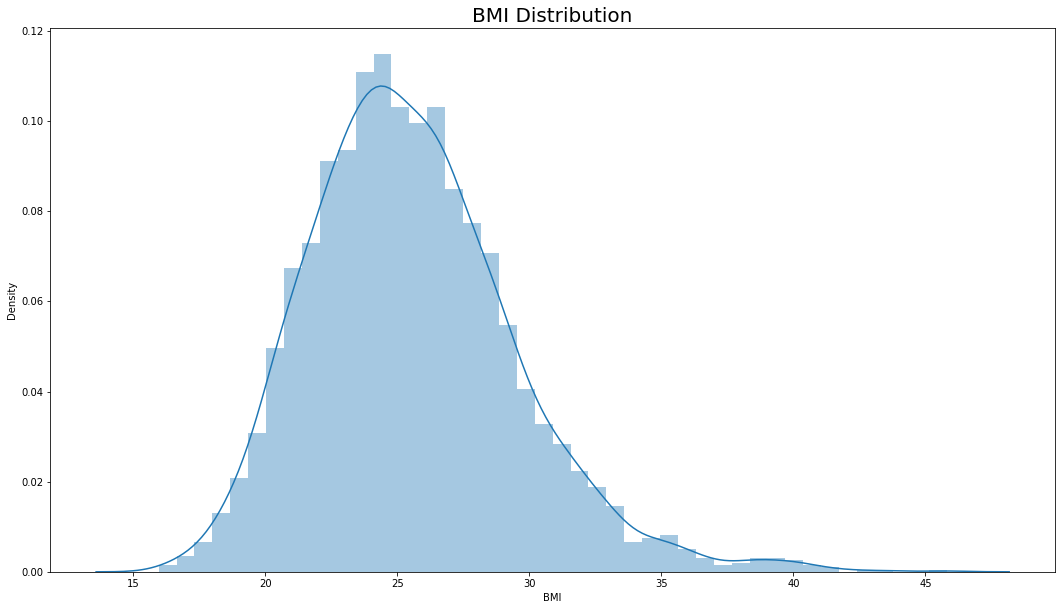

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



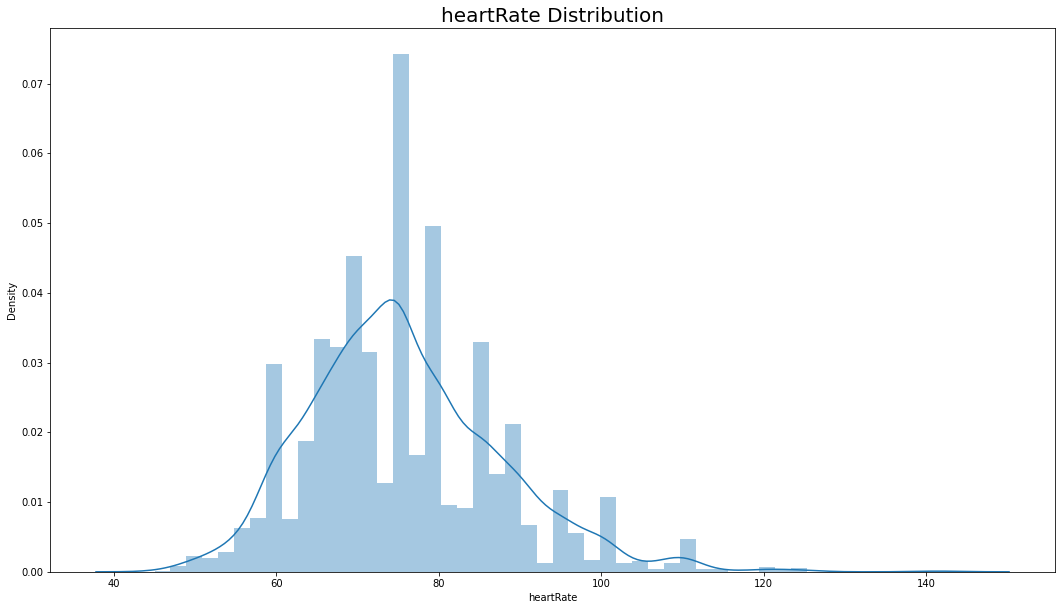

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



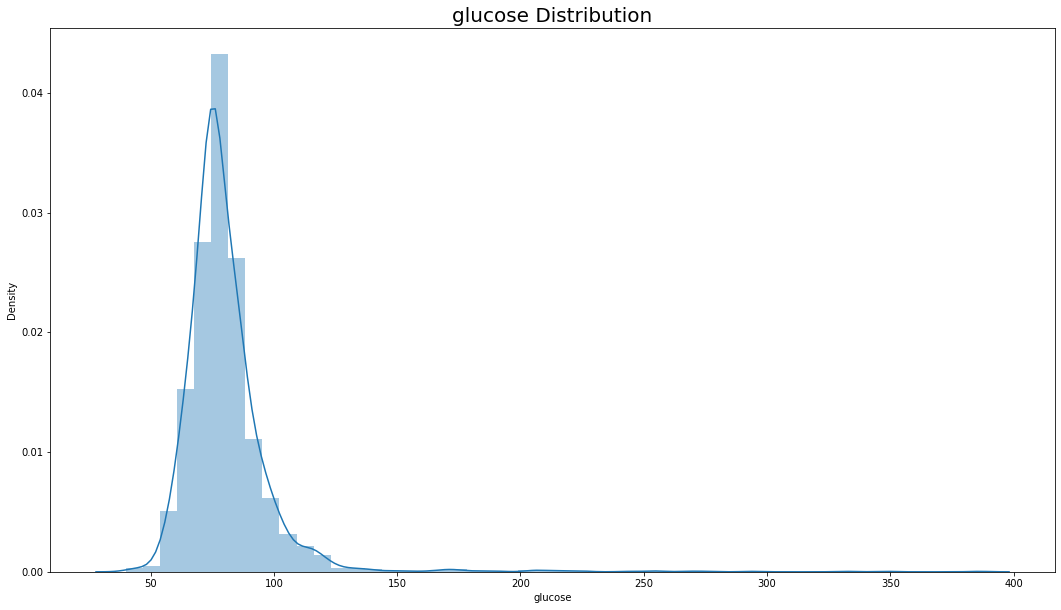

In [ ]:
numeric_features = ['cigsPerDay', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose']
for feature in numeric_features:
    plt.figure(figsize=(18, 10), facecolor='w')
    sns.distplot(data[feature])
    plt.title('{} Distribution'.format(feature), fontsize=20)
    plt.show()

Among the numerical features:

totChol, sysBP, diaBPand BMI has an uniform distribution and the rest are unevenly distributed

cigsPerDay has a highly uneven distribution with the most data present in 

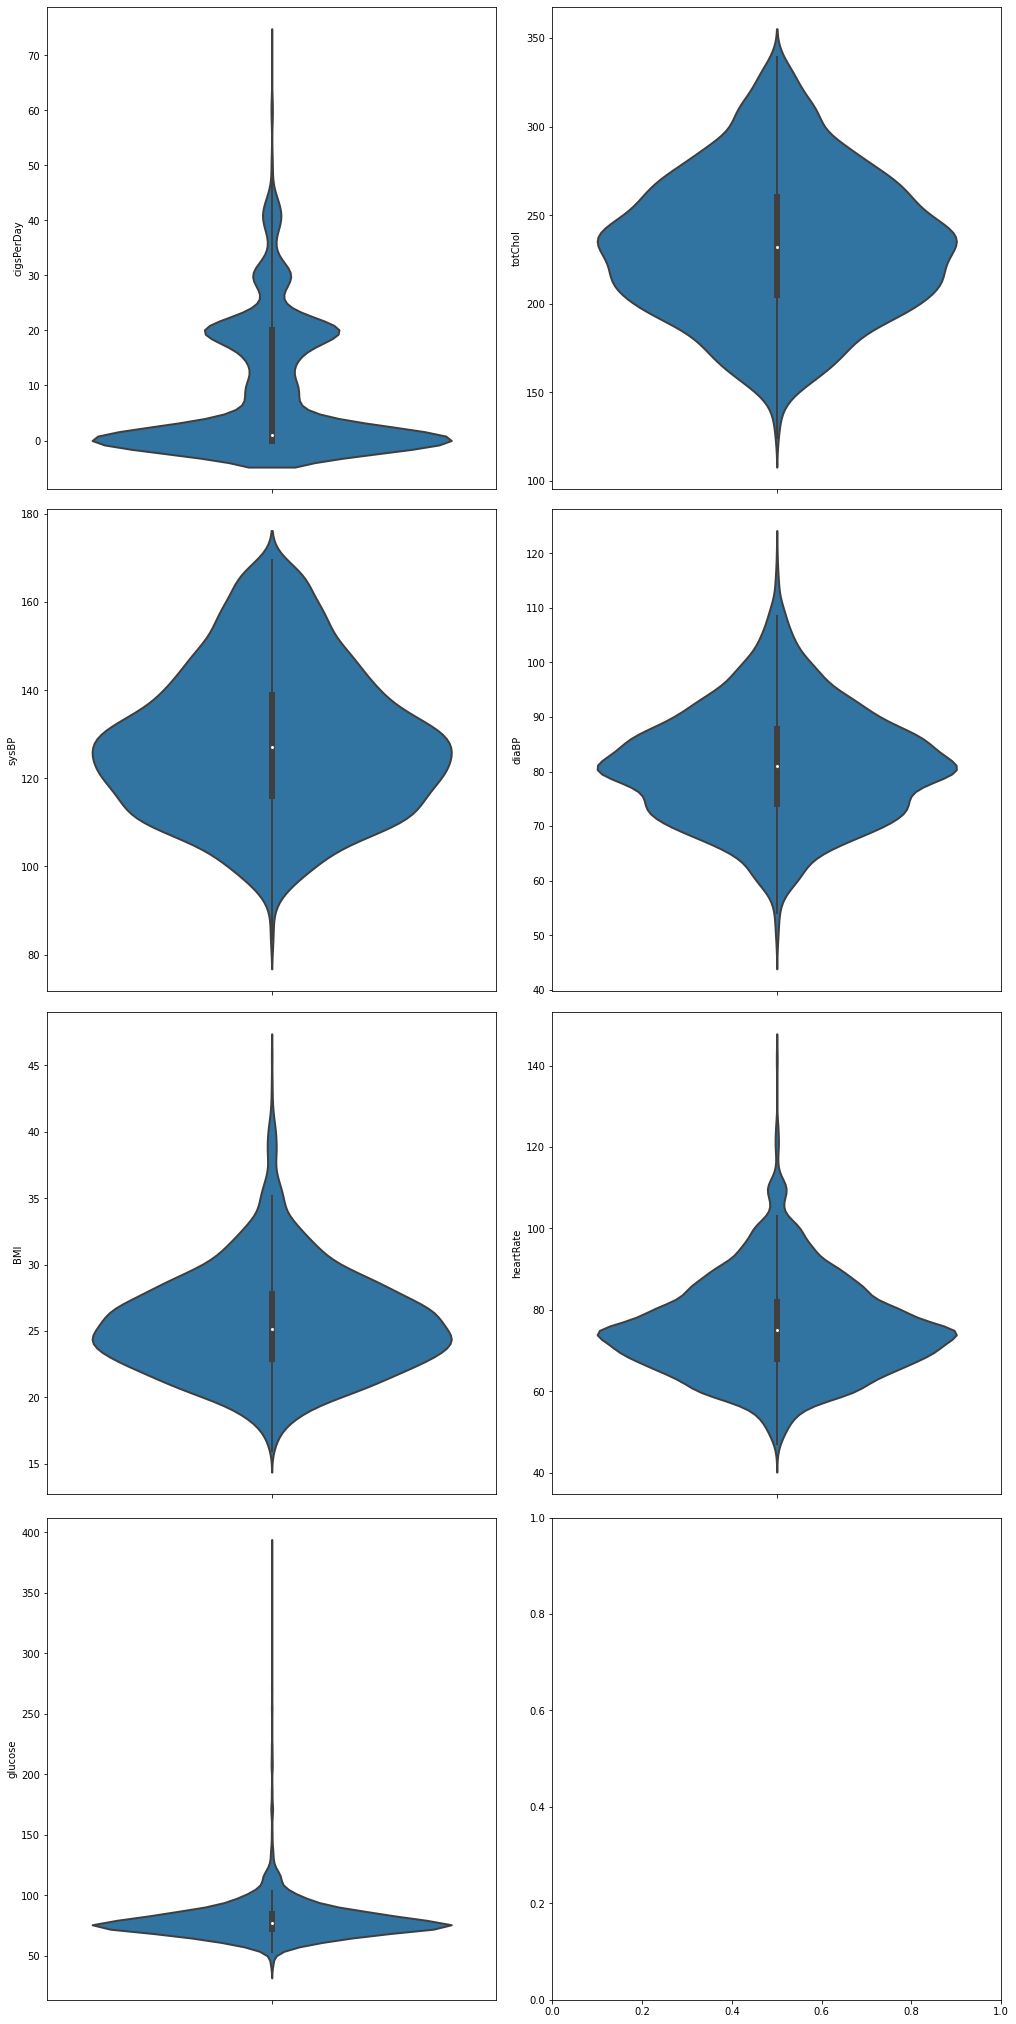

In [ ]:
num_plots = len(numeric_features)
total_cols = 2
total_rows = num_plots//total_cols + 1
color = ['m', 'g', 'b', 'r', 'y', 'v', 'o']
fig, axs = plt.subplots(nrows=total_rows, ncols=total_cols,
                        figsize=(7*total_cols, 7*total_rows), facecolor='w', constrained_layout=True)
for i, var in enumerate(numeric_features):
    row = i//total_cols
    pos = i % total_cols
    plot = sns.violinplot(y=var, data=data, ax=axs[row][pos], linewidth=2)

cigsPerDay has uneven distribution although most of the data is concentrated on 0

Target Variable

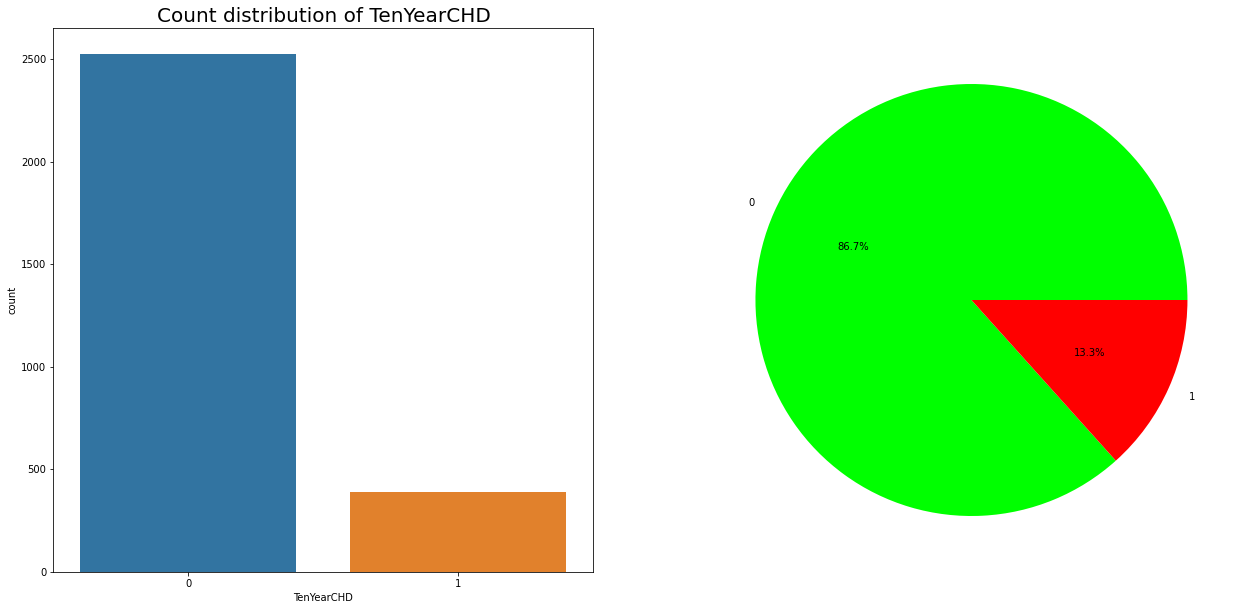

In [ ]:
#Distribution of outcome variable, Heart Disease
plt.figure(figsize=(12, 10), facecolor='w')
plt.subplots_adjust(right=1.5)
plt.subplot(121)
sns.countplot(x="TenYearCHD", data=data)
plt.title("Count distribution of TenYearCHD", size=20)
plt.subplot(122)
labels=[0,1]
plt.pie(data["TenYearCHD"].value_counts(),autopct="%1.1f%%",labels=labels,colors=["lime","red"])
plt.show()

The distribution is highly imbalanced. As in, the number of negative cases outweigh the number of positive cases. This would lead to class imbalance problem while fitting our models. Therefore, this problem needs to be addressed and taken care of.

2. Bivariate Analysis

  Relationship between education and cigsPerDay


In [ ]:
#Grouping education and cigsPerDay

graph_1 = data.groupby("education", as_index=False).cigsPerDay.mean()

(array([ 4.,  6.,  8., 10., 12., 14.]),
 <a list of 6 Text major ticklabel objects>)

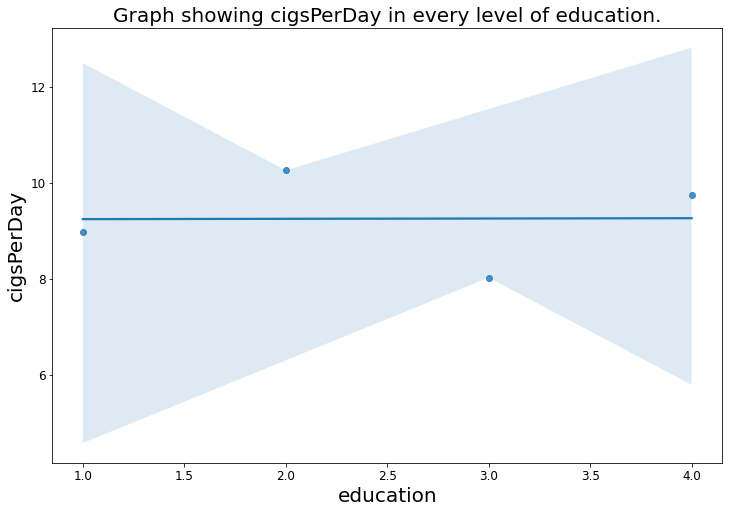

In [ ]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_1["education"], y=graph_1["cigsPerDay"])
plt.title("Graph showing cigsPerDay in every level of education.", size=20)
plt.xlabel("education", size=20)
plt.ylabel("cigsPerDay", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

There is no linear relationship observed.

Level 3 education shows the lowest mean.

Which gender has more risk of coronary heart disease CHD

In [ ]:
#checking for which gender has more risk of coronary heart disease CHD

graph_2 = data.groupby("sex", as_index=False).TenYearCHD.sum()

(array([  0.,  50., 100., 150., 200., 250.]),
 <a list of 6 Text major ticklabel objects>)

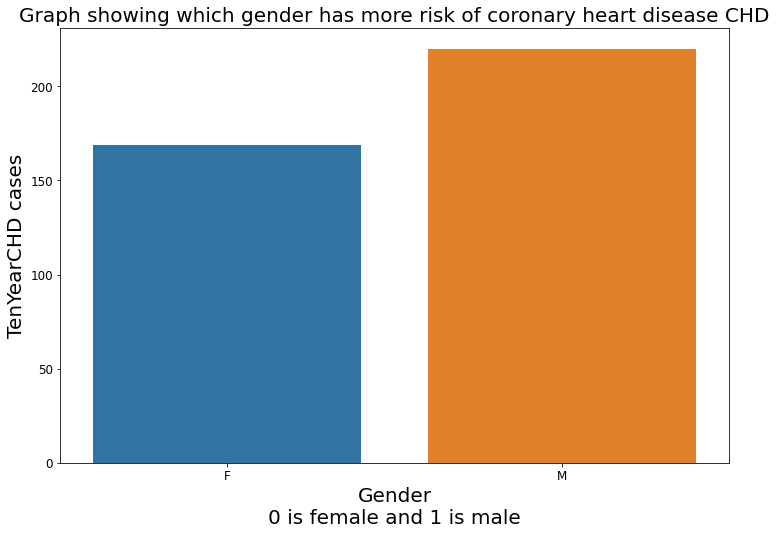

In [ ]:
#Ploting the above values

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_2["sex"], y=graph_2["TenYearCHD"])
plt.title("Graph showing which gender has more risk of coronary heart disease CHD", size=20)
plt.xlabel("Gender\n0 is female and 1 is male",size=20)
plt.ylabel("TenYearCHD cases", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

According to this dataset, males have shown a slighly higher risk of coronary heart disease TenYearCHD.

Which age group has more smokers.

(array([  0.,  20.,  40.,  60.,  80., 100.]),
 <a list of 6 Text major ticklabel objects>)

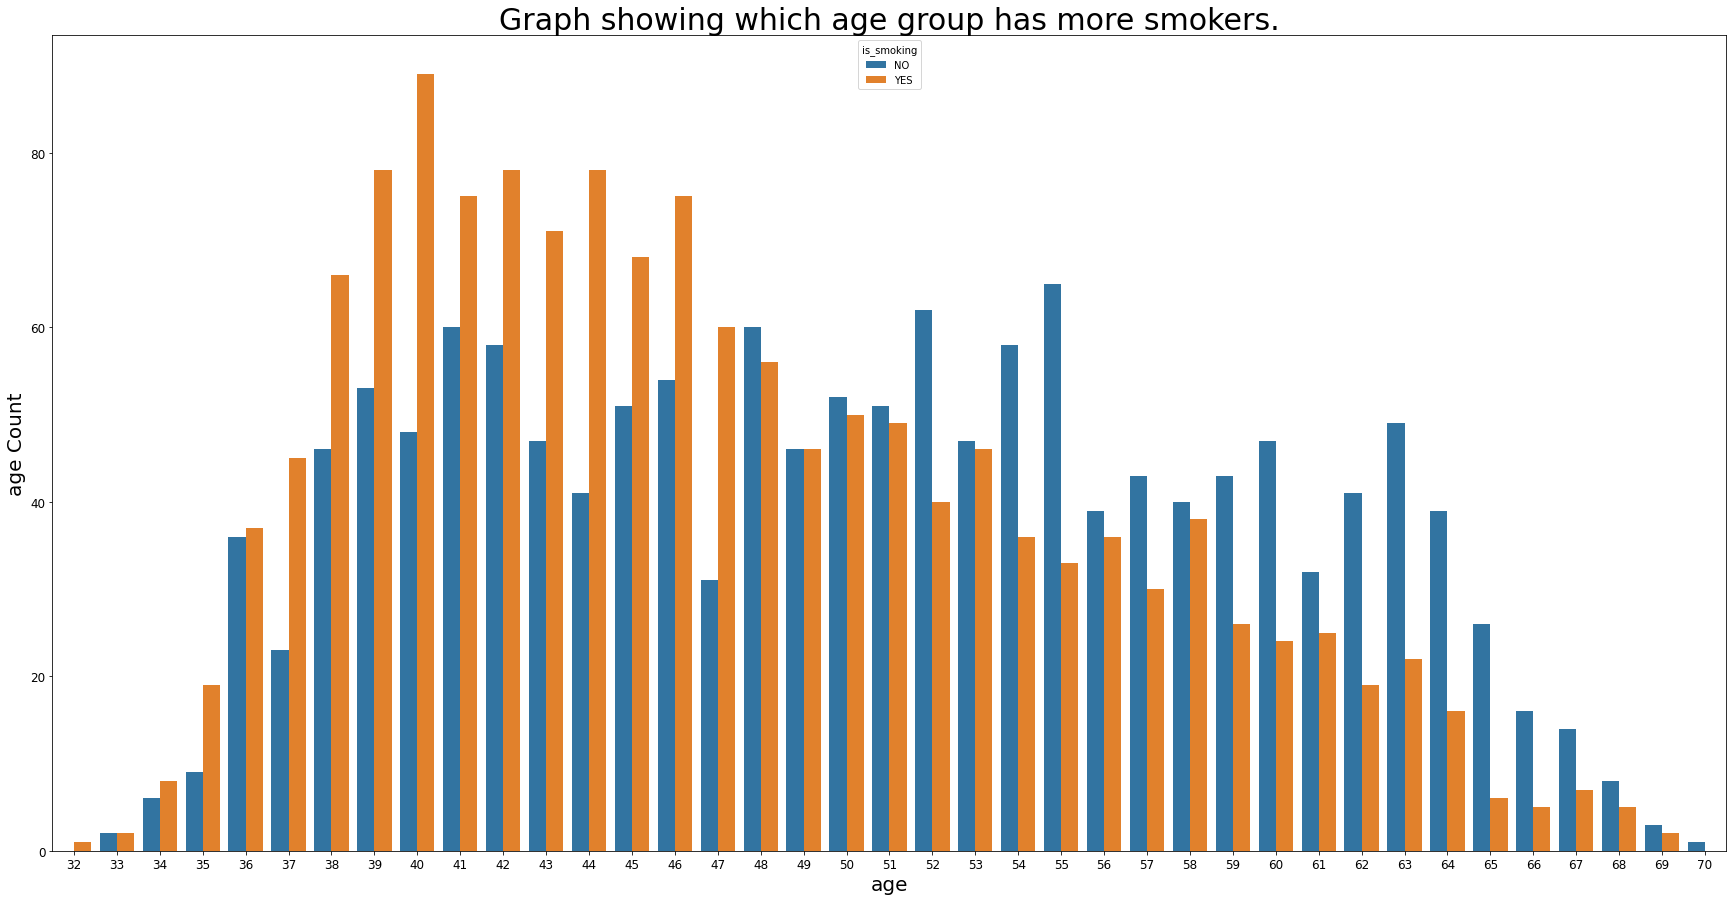

In [ ]:
#Distribution of current smokers with respect to age
plt.figure(figsize=(30,15), facecolor='w')
sns.countplot(x="age",data=data,hue="is_smoking")
plt.title("Graph showing which age group has more smokers.", size=30)
plt.xlabel("age", size=20)
plt.ylabel("age Count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

Mid-age groups ranging from the age of 38 - 46 have more number of currentSmokers

No currentSmokers observed below the age of 32

maximum age for is_smoking is 70

Relation between cigsPerDay and risk of coronary heart disease.

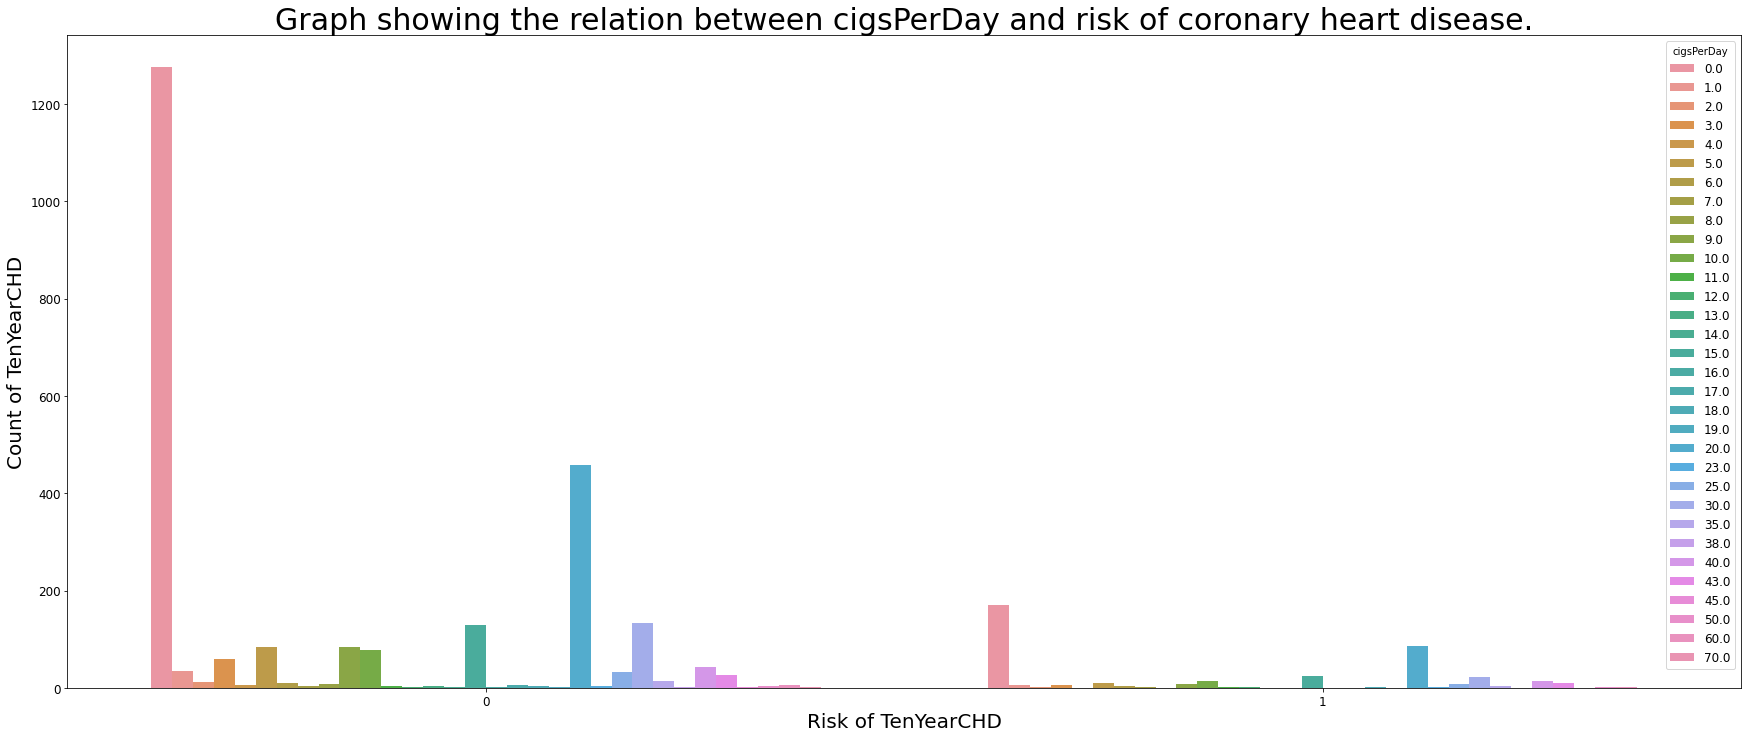

In [ ]:
plt.figure(figsize=(30,12), facecolor='w')
sns.countplot(x="TenYearCHD",data=data,hue="cigsPerDay")
plt.legend(title='cigsPerDay', fontsize='large')
plt.title("Graph showing the relation between cigsPerDay and risk of coronary heart disease.", size=30)
plt.xlabel("Risk of TenYearCHD", size=20)
plt.ylabel("Count of TenYearCHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)
plt.show()

Low cigsPerDay comes with lower risk of CHD.

Those who don't smoke, i.e., with a cigsPerDay of 0.0 has a really low risk of contracting the disease

Although that is the case, low cigsPerDay doesn't actually guarantee a much lower risk of CHD

Relation between sysBP and risk of CHD.

(array([  0.,  20.,  40.,  60.,  80., 100., 120., 140., 160.]),
 <a list of 9 Text major ticklabel objects>)

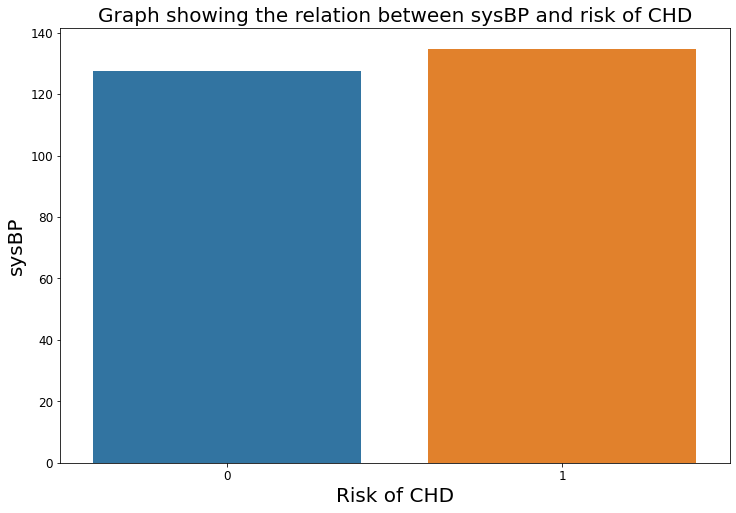

In [ ]:
# Grouping up the data and ploting it

graph_3 = data.groupby("TenYearCHD", as_index=False).sysBP.mean()

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_3["TenYearCHD"], y=graph_3["sysBP"])
plt.title("Graph showing the relation between sysBP and risk of CHD", size=20)
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("sysBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

(array([ 60.,  70.,  80.,  90., 100., 110., 120., 130., 140.]),
 <a list of 9 Text major ticklabel objects>)

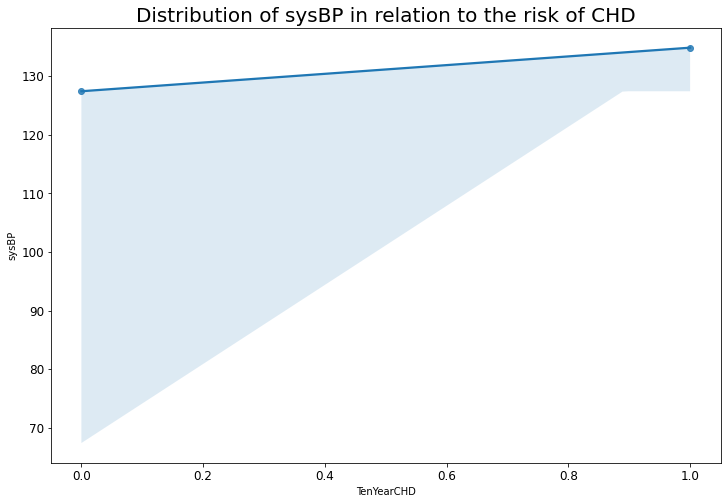

In [ ]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_3["TenYearCHD"], y=graph_3["sysBP"])
plt.title("Distribution of sysBP in relation to the risk of CHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

Minor relation of higher risk of TenYearCHD found with higher sysBP

Majority of people with sysBP ranging from 72 - 130 has lower chance of contracting the disease.

Relation between diaBP and risk of CHD

(array([ 0., 10., 20., 30., 40., 50., 60., 70., 80., 90.]),
 <a list of 10 Text major ticklabel objects>)

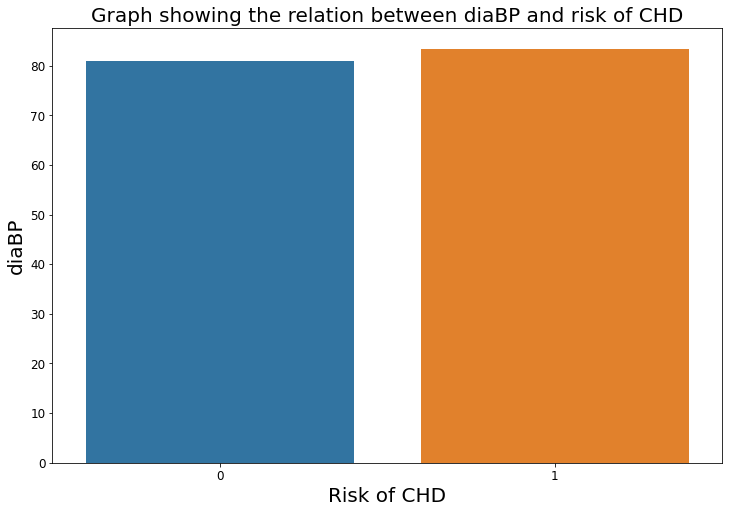

In [ ]:
# Grouping up the data and ploting it

graph_4 = data.groupby("TenYearCHD", as_index=False).diaBP.mean()

plt.figure(figsize=(12,8), facecolor='w')
sns.barplot(x=graph_4["TenYearCHD"], y=graph_4["diaBP"])
plt.title("Graph showing the relation between diaBP and risk of CHD", size=20)
plt.xlabel("Risk of CHD", size=20)
plt.ylabel("diaBP", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

(array([30., 40., 50., 60., 70., 80., 90.]),
 <a list of 7 Text major ticklabel objects>)

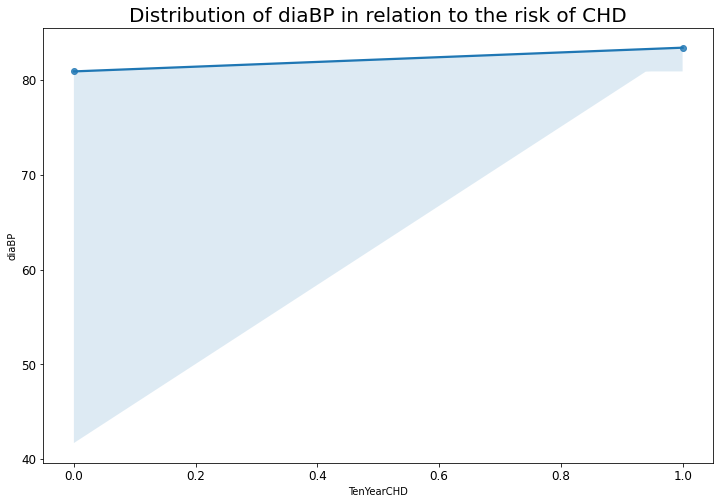

In [ ]:
plt.figure(figsize=(12,8), facecolor='w')
sns.regplot(x=graph_4["TenYearCHD"], y=graph_4["diaBP"])
plt.title("Distribution of diaBP in relation to the risk of CHD", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

Minor relation found between higher risk of TenYearCHD with higher diaBP similar to the previous one

Majority of people with diaBP ranging upto 80.0 has lower chance of contracting the disease.

Relation between age and totChol

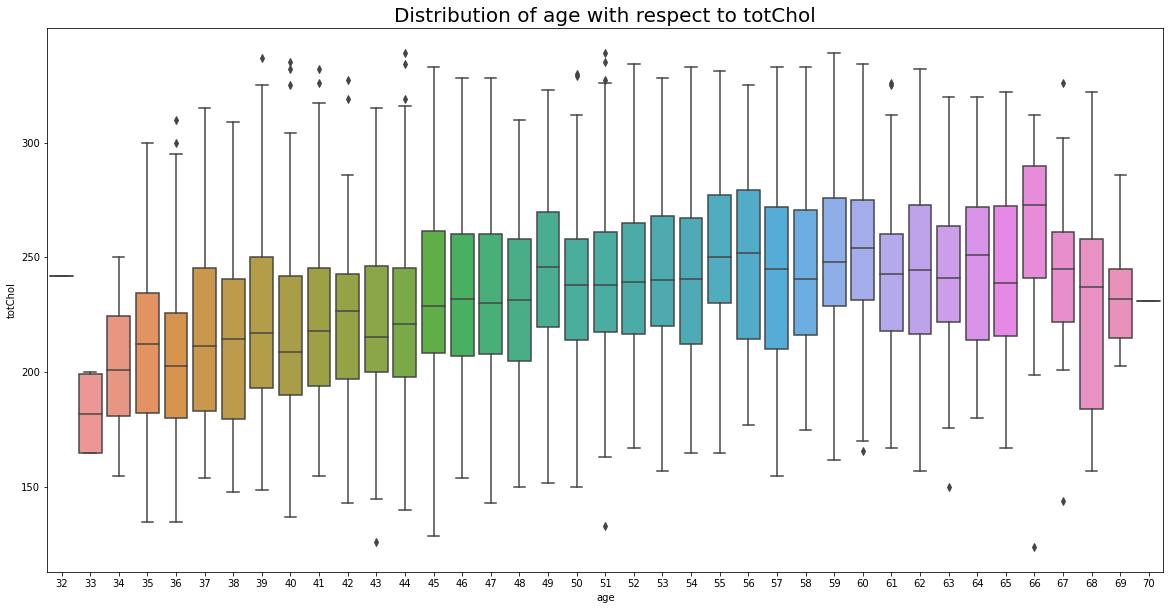

In [ ]:
plt.figure(figsize=(20,10), facecolor='w')
sns.boxplot(x="age",y="totChol",data=data)
plt.title("Distribution of age with respect to totChol", size=20)
plt.show()

The boxplots are shifted in an upwardly manner suggesting that aged people have more cholesterol (bad cholesterol in general)

3. Multivariate Analysis

(array([-50.,   0.,  50., 100., 150., 200., 250., 300.]),
 <a list of 8 Text major ticklabel objects>)

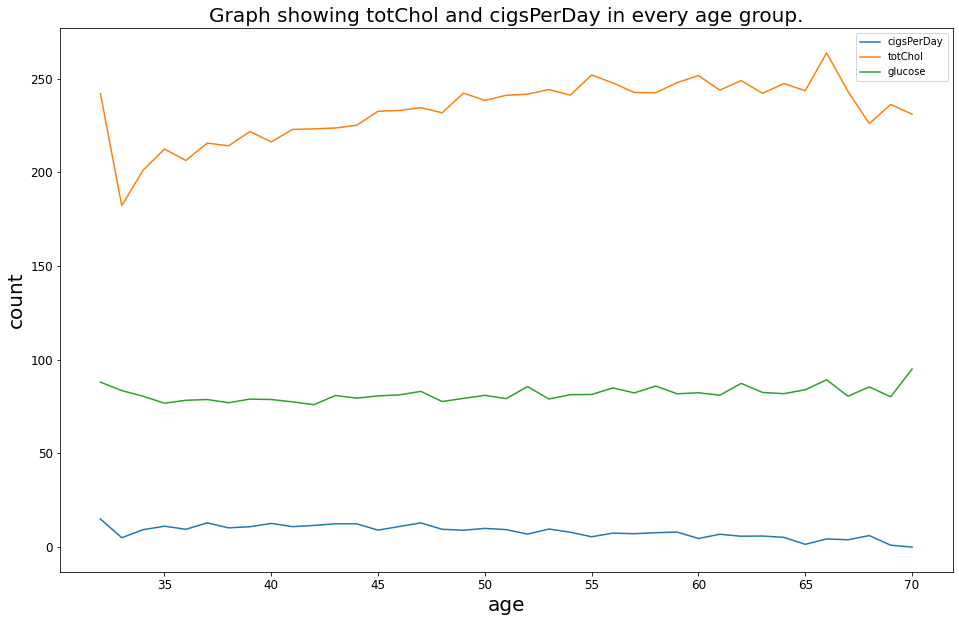

In [ ]:
#Plotting a linegraph to check the relationship between age and cigsPerDay, totChol, glucose.

graph_5 = data.groupby("age").cigsPerDay.mean()
graph_6 = data.groupby("age").totChol.mean()
graph_7 = data.groupby("age").glucose.mean()

plt.figure(figsize=(16,10), facecolor='w')
sns.lineplot(data=graph_5, label="cigsPerDay")
sns.lineplot(data=graph_6, label="totChol")
sns.lineplot(data=graph_7, label="glucose")
plt.title("Graph showing totChol and cigsPerDay in every age group.", size=20)
plt.xlabel("age", size=20)
plt.ylabel("count", size=20)
plt.xticks(size=12)
plt.yticks(size=12)

There is a minor relation between totChol and glucose.

totChol has a steep, linear and inverse graph for lower ranges of age

cigsPerDay has a fairly parallel relationship with age

Distribution of sysBP vs diaBP with respect to currentSmoker and male attributes

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



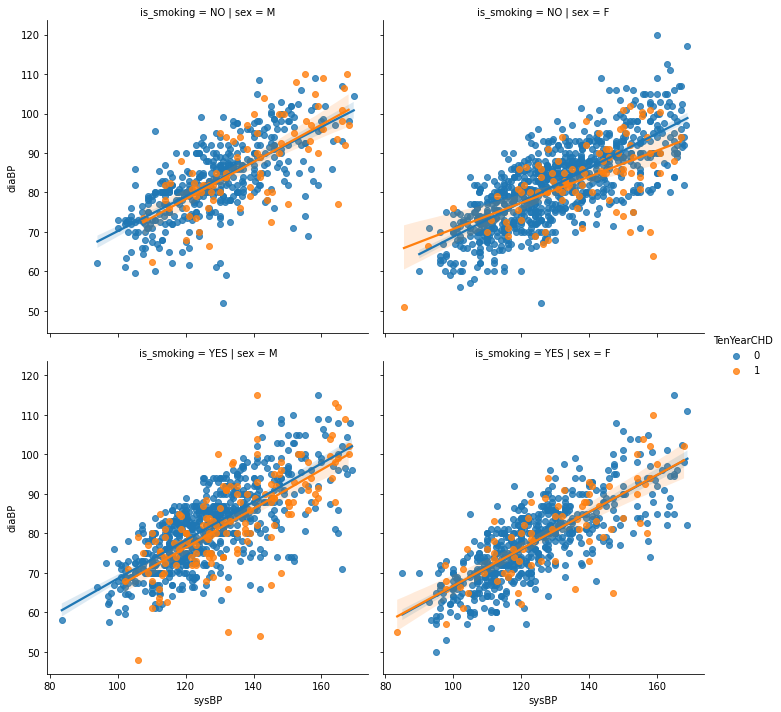

In [ ]:
#sysBP vs diaBP with respect to currentSmoker and male attributes
#plt.figure(figsize=(18, 9), facecolor='w')
sns.lmplot('sysBP', 'diaBP', 
           data=data,
           hue="TenYearCHD",
           col="male",row="currentSmoker")
plt.show()